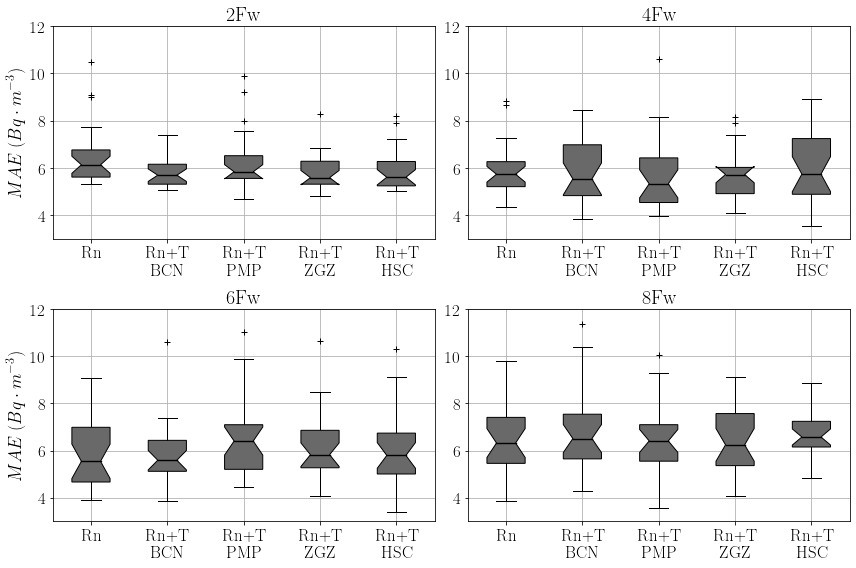

In [2]:
__author__ = '@Tssp'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=17
plt.rcParams['ytick.labelsize']=17
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=20

# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
l = []
for i in range(2, 10, 2):
    try:
        l.append(pd.read_csv(CsvPath + f'ErrorsANN{i}Fw.csv'))
    except:
        continue
lbl = ['Rn', 'Rn+T\n BCN', 'Rn+T\n PMP', 'Rn+T\n ZGZ', 'Rn+T\n HSC']
fig = plt.figure(figsize=(12, 8))
for n in range(len(l)):
        ax = plt.subplot(2, 2, n+1)
        xaxis = ax.get_xaxis()
        XnFw = [ l[n]['Rn'], l[n]['BCN'], l[n]['PMP'], l[n]['ZGZ'], l[n]['HSC']]
        bplot = ax.boxplot(XnFw, sym='+', labels=lbl, notch=True, patch_artist=True,
                       medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
        plt.grid()
        colors = ['dimgray']*5
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        plt.tight_layout()
        ax.set_title(f'{n*2 + 2}Fw')
        ax.set_ylim([3.0, 12])
        if n == 0:
            ax.set_ylabel('$MAE\ (Bq \cdot m^{-3})$', fontsize=18)
        if n == 1:
            ax.set_ylabel('')
            ax.set_xlabel('')
        elif n == 2:
            ax.set_ylabel('$MAE\ (Bq \cdot m^{-3})$', fontsize=18)
        elif n == 3:
            ax.set_ylabel('')
fig.savefig(f'../../Figures/Boxplots/ANN/ANN_MAE_Boxplot_wcolor_AllFw_v3.eps', dpi=300)
plt.show()